<a href="https://colab.research.google.com/github/dlbkv/AI-Step/blob/master/module7/lab22_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання

Провести кластеризації банківських рахунків. [Опис даних](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata/data)

* перевірте дані на пропущені значення
* нормалізуйте дані за допомогою:
  1. StandartScaler
  2. MinMaxScaler
* Визначіть оптимальну кількість кластерів за допомогою методу "ліктя". Оберіть метрики:
  1. distortion
  2. silhouette
  3. calinski_harabasz
* Визначіть оптимальну кількість кластерів за силуетних діаграм
* Обрахуйте середні(або медіанні) значення по кожному кластеру та візуалізуйте результат. Дайте опис кластерам
* Проведіть кластеризацію для очищених від викидів даних
* Проведіть кластеризацію за допомогою DBSCAN


In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module7/data/CC%20GENERAL.csv')
df.drop(columns='CUST_ID', inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64  
 11  PURCHASES_TRX                     8636 non-null   int64  
 12  CREDIT_LIMI

In [44]:
df.shape

(8636, 18)

In [42]:
df_without_outliers = df
for column_name in df.columns:
    column = df[column_name]
    q1 = column.quantile(q=0.25)
    q3 = column.quantile(q=0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    mask = (column >= lower) & (column <= upper)
    df_without_outliers = df_without_outliers[mask]

<ipython-input-42-322b6611a741>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_without_outliers = df_without_outliers[mask]
<ipython-input-42-322b6611a741>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_without_outliers = df_without_outliers[mask]
<ipython-input-42-322b6611a741>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_without_outliers = df_without_outliers[mask]
<ipython-input-42-322b6611a741>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_without_outliers = df_without_outliers[mask]
<ipython-input-42-322b6611a741>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_without_outliers = df_without_outliers[mask]
<ipython-input-42-322b6611a741>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_without_outliers = df_without_outliers[mask]
<ipython-input-42-322b6611a7

In [43]:
df_without_outliers.shape

(2951, 18)

In [5]:
df = df.dropna()

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = scaler.fit_transform(df)



In [16]:
from sklearn.cluster import KMeans


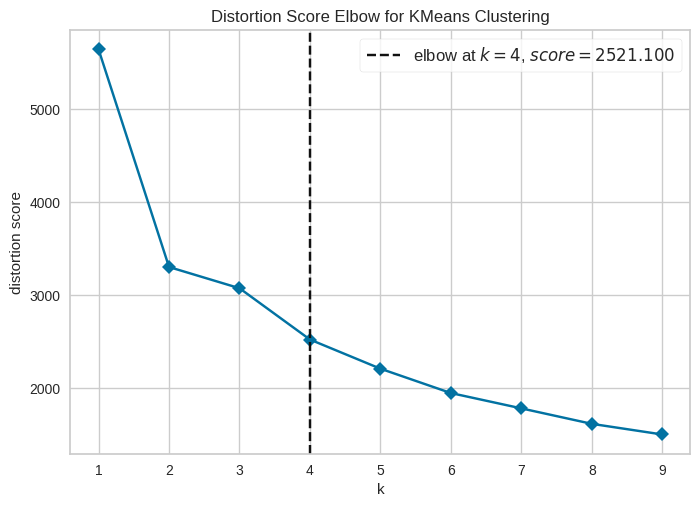

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

model = KMeans(n_init='auto', random_state=42)
visualizer = KElbowVisualizer(model,
                              k=(1, 10),
                              timings=False,
                              metric='distortion', # distortion, silhouette, calinski_harabasz
                              distance_metric='euclidean'
                              )

visualizer.fit(data)
visualizer.show()

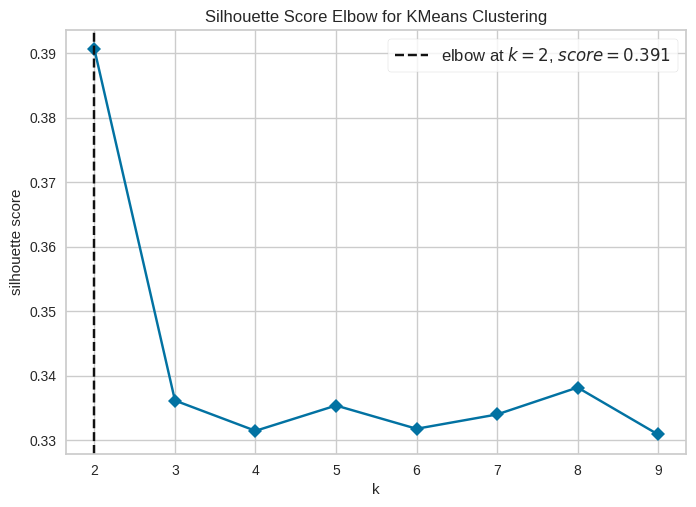

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [21]:
visualizer = KElbowVisualizer(model,
                              k=(2, 10),
                              timings=False,
                              metric='silhouette', # distortion, silhouette, calinski_harabasz
                              distance_metric='euclidean'
                              )

visualizer.fit(data)
visualizer.show()

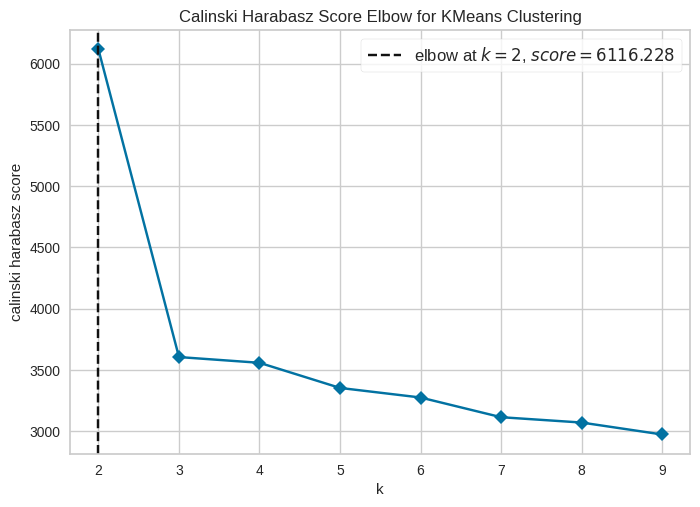

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [22]:
visualizer = KElbowVisualizer(model,
                              k=(2, 10),
                              timings=False,
                              metric='calinski_harabasz', # distortion, silhouette, calinski_harabasz
                              distance_metric='euclidean'
                              )

visualizer.fit(data)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


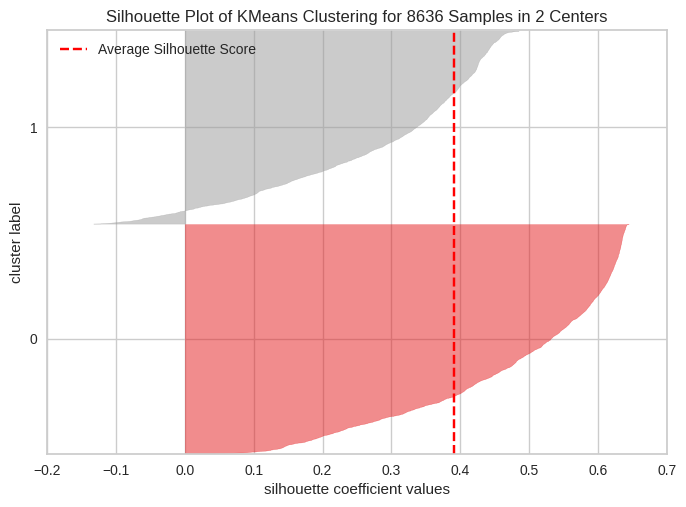

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 8636 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [27]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(KMeans(2))
visualizer.fit(data)
visualizer.show()

In [28]:
kmeans = KMeans(2)

kmeans.fit(data)

df['cluster_id'] = kmeans.labels_

df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_id
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,1
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0


In [29]:
df['cluster_id'].value_counts()

cluster_id
1    4690
0    3946
Name: count, dtype: int64

<Axes: xlabel='cluster_id'>

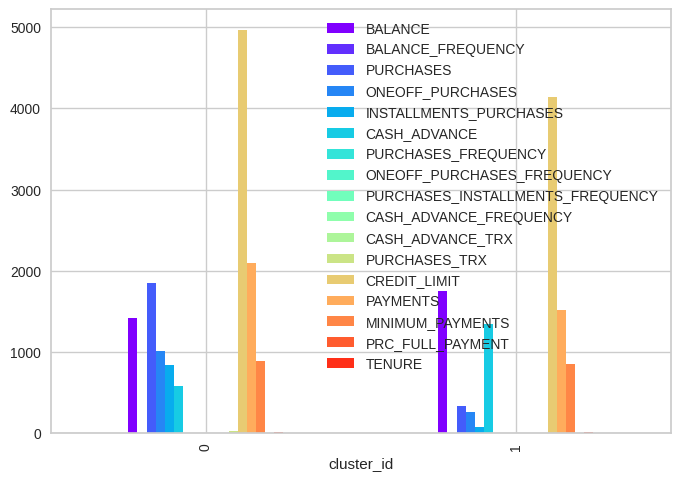

In [45]:
import numpy as np
color = plt.cm.rainbow(np.linspace(0, 1, df.shape[1]))

results.plot(kind='bar', color=color)

In [39]:
results = df.groupby(by='cluster_id').mean()
results

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster_id,,,,,,,,,,,,,,,,,
0,1418.736644,0.945311,1853.815253,1014.201348,839.999937,574.717144,0.893041,0.338264,0.728534,0.078244,1.973137,29.099595,4971.596617,2099.562323,881.681493,0.260269,11.601622
1,1754.764046,0.852735,328.463102,260.530981,68.180171,1347.092957,0.161944,0.094550,0.066170,0.187548,4.442004,3.198294,4143.892938,1519.377386,849.684929,0.074355,11.477825


После удаления выбросов

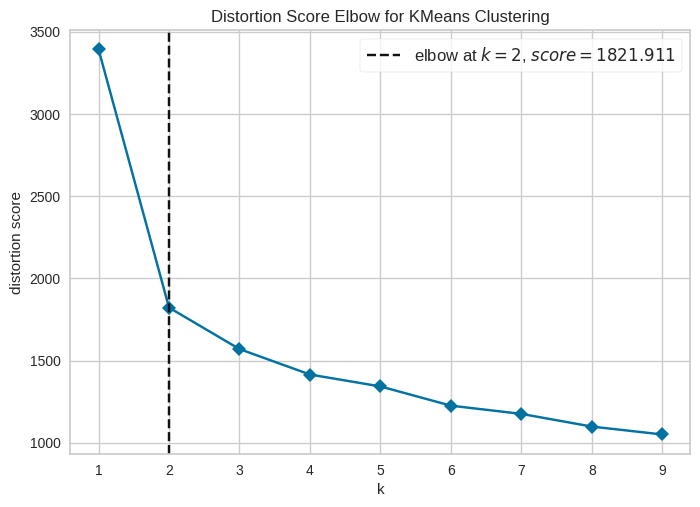

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
scaler = MinMaxScaler()
data_wout = scaler.fit_transform(df_without_outliers)

model = KMeans(n_init='auto', random_state=42)
visualizer = KElbowVisualizer(model,
                              k=(1, 10),
                              timings=False,
                              metric='distortion', # distortion, silhouette, calinski_harabasz
                              distance_metric='euclidean'
                              )

visualizer.fit(data_wout)
visualizer.show()

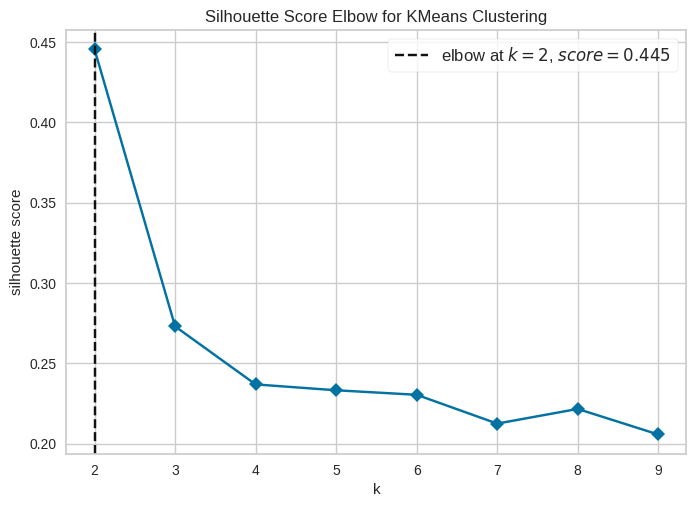

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [47]:
model = KMeans(n_init='auto', random_state=42)
visualizer = KElbowVisualizer(model,
                              k=(2, 10),
                              timings=False,
                              metric='silhouette', # distortion, silhouette, calinski_harabasz
                              distance_metric='euclidean'
                              )

visualizer.fit(data_wout)
visualizer.show()

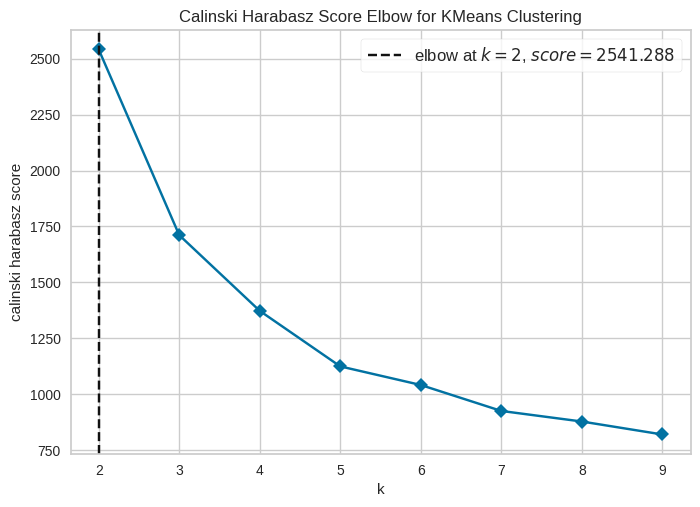

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [48]:
model = KMeans(n_init='auto', random_state=42)
visualizer = KElbowVisualizer(model,
                              k=(2, 10),
                              timings=False,
                              metric='calinski_harabasz', # distortion, silhouette, calinski_harabasz
                              distance_metric='euclidean'
                              )

visualizer.fit(data_wout)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


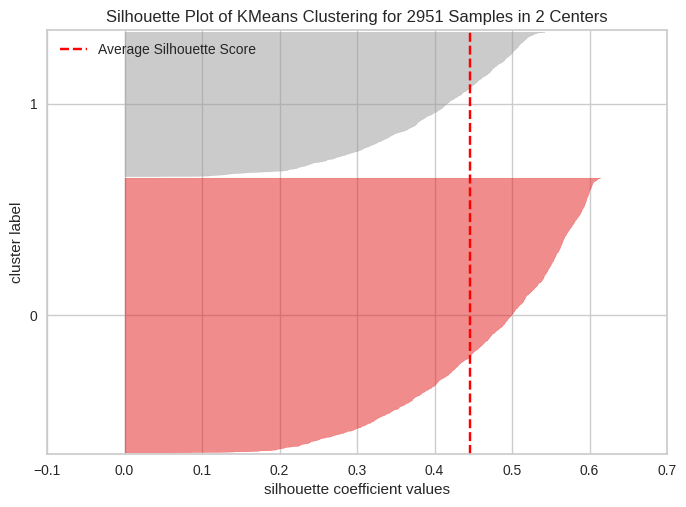

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2951 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [53]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(KMeans(2))
visualizer.fit(data_wout)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


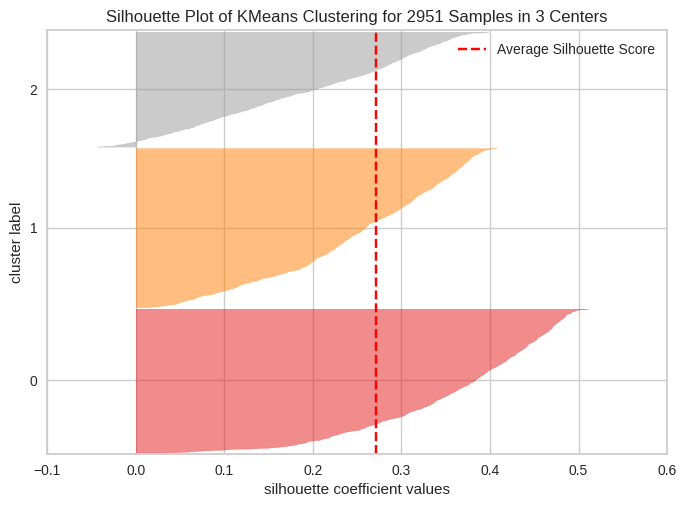

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2951 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [54]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(KMeans(3))
visualizer.fit(data_wout)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


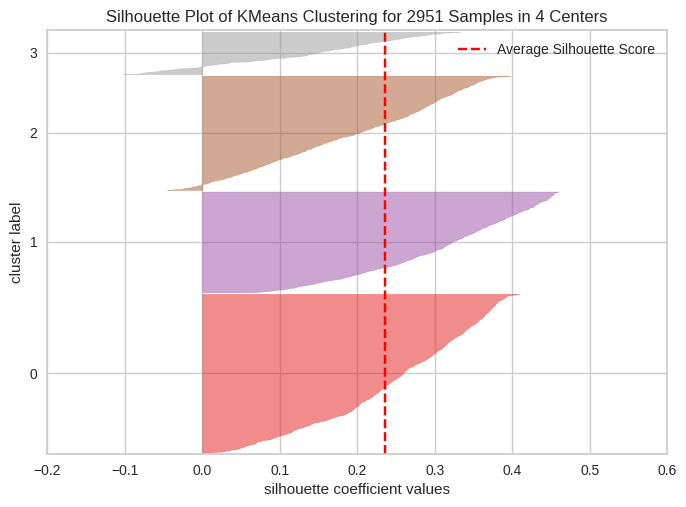

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2951 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [55]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(KMeans(4))
visualizer.fit(data_wout)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


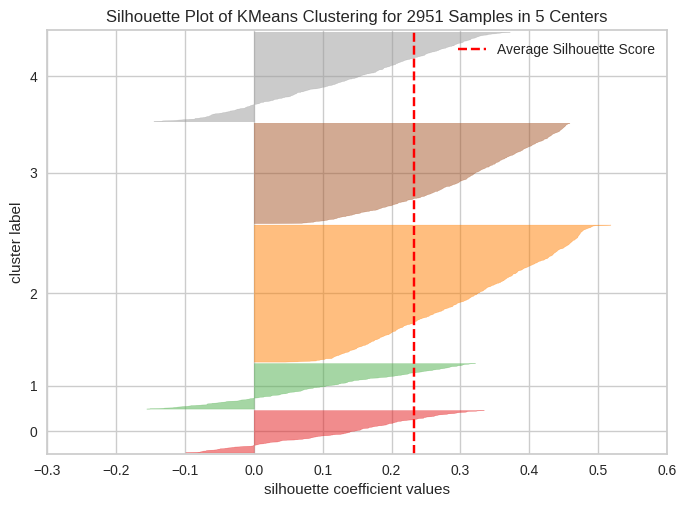

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2951 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [56]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(KMeans(5))
visualizer.fit(data_wout)
visualizer.show()